Demonstrating the efficacy of Bartlett's Method and Welch's Method

In [270]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from numpy.fft import fft

In [271]:
nSamples = 2**16
x = random.randn(nSamples)

# Periodogram

In [272]:
# DTFT
X = fft(x)
X_periodogram = ((np.abs(X))**2)/nSamples

w = 2*np.pi / nSamples * np.arange(nSamples)

# Bartlett's Method

In [273]:
def bartlett(x,bin_size=256):
    bins = int(nSamples/bin_size)-1

    X_B = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
    m = 0
    for k in range(bins):
        s = x[m:m+bin_size]
        Xs = fft(s)
        Xs_periodogram = (np.abs(Xs)**2) / bin_size
        X_B += Xs_periodogram
        
        m += bin_size

    X_B /= bins

    return X_B

# Welch's Method

In [274]:
def welch(x,bin_size=256,m_inc=128):
    bins = int(nSamples / m_inc)-1

    window_function = np.hamming(bin_size)
    U = np.sum(window_function**2)/bin_size # average energy of the window function

    X_W = np.zeros(bin_size) # will store the sum of the individual periodogram's, to be averaged
    m = 0
    for k in range(bins):
        s = x[m:m+bin_size] * window_function
        Xs = fft(s)
        Xs_periodogram = (np.abs(Xs)**2) / (bin_size*U)
        X_W += Xs_periodogram
        
        m += m_inc # allow segment overlap!

    X_W /= bins

    return X_W

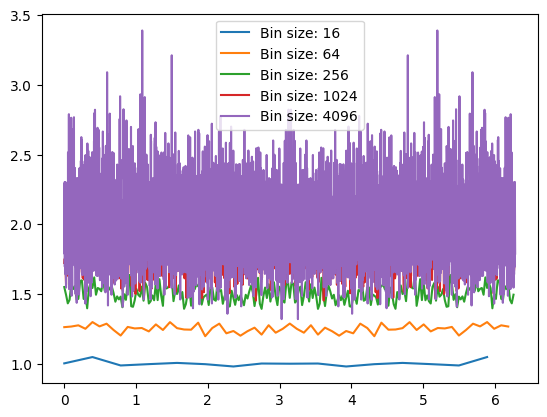

In [275]:
bartlett_bin_sizes = [16,64,256,1024,4096]
for j,bin_size in enumerate(bartlett_bin_sizes):
    X = bartlett(x,bin_size)
    w = 2*np.pi * np.arange(len(X))/len(X)
    plt.plot(w,X+j*0.5,label=f"Bin size: {bin_size}")

plt.legend()
plt.show()